In [2]:
# 参考
# http://naoyat.hatenablog.jp/entry/2012/03/03/221022

from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pi = np.pi

class FourierSeries:
    def fourier(self, fun, n_max):
        a = []
        b = []
        for n in range(0, 1+n_max):
            res, err = quad(lambda x:fun(x)*np.cos(n*x), -pi, pi)
            a.append(res/pi)
            res, err = quad(lambda x:fun(x)*np.sin(n*x), -pi, pi)
            b.append(res/pi)
        def fn(x):
            sum = a[0] / 2
            for n in range(1, 1+n_max):
                sum += a[n]*np.cos(n*x) + b[n]*np.sin(n*x)
            return sum
        return fn, [np.sqrt(aa**2+bb**2) for aa, bb in zip(a, b)]

    def show(self, f, f_fn, x_min=-pi-0.5, x_max=pi+0.5, y_min=-1.5, y_max=1.5):
        plt.subplot(212)
        plt.axis([x_min, x_max, y_min, y_max])
        
        xs = np.linspace(x_min, x_max, 256)
        plt.plot(xs, list(map(f, xs)), 'b:', lw=1)
        plt.plot(xs, list(map(f_fn, xs)), 'r-', lw=1)
        plt.hlines([-1, 0, 1],
                   xmin=x_min, xmax=x_max, linewidth=0.2, 
                   linestyles="dashed")
        plt.show()

    def doAll(self, f):
        f_fn, f_ser = self.fourier(f, 10)
        print(f_ser)
        plt.figure(figsize=(4,6))
        plt.subplot(211)
        plt.axis([0, 10, -0.1, 1.1])
        plt.hlines(np.linspace(0.1, 0.9, 9),
                   xmin=0, xmax=10, linewidth=0.2, 
                   linestyles="dashed")
        plt.hlines([0, 1],
                   xmin=0, xmax=10, linewidth=0.5, 
                   linestyles="dashed")
        
        plt.plot(f_ser)
        self.show(f, f_fn)


# 周期 2π の周期関数
def square(x):
    x = (x + pi) % (pi * 2) - pi
    if x >= 0:
        return 1
    else:
        return -1

def pwm(ratio):
    def sq(x):
        x = (x + pi) % (pi * 2) - pi
        if x >= -pi+2*pi*ratio:
            return 1
        else:
            return -1
    return sq

def saw(x):
    x = (x + pi) % (pi * 2) - pi
    return x / pi 

def triangle(x):
    x = (x + pi) % (pi * 2) - pi
    return -2*x/pi+1 if x>0 else 2*x/pi+1




[7.8173204057416813e-17, 0.63661977236758138, 0.31830988618379069, 0.21220659078919374, 0.15915494309189526, 0.12732395447351619, 0.10610329539459711, 0.090945681766797251, 0.079577471545947603, 0.070735530263064658, 0.063661977236758135]


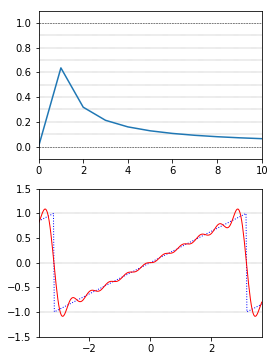

In [4]:
fs = FourierSeries()
fs.doAll(saw)

[0.0, 1.2732395447351628, 7.0712588405576435e-17, 0.42441318157838753, 3.2724331592153012e-17, 0.25464790894703254, 2.8177366075911651e-17, 0.18189136353359456, 2.6055301906274569e-16, 0.14147106052612932, 4.6355842368409666e-16]


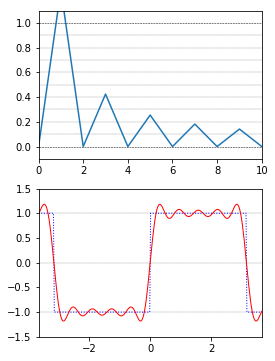

In [6]:
fs.doAll(square)

C:\Users\nagis\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


[1.3999982900454591, 0.29177129923381379, 0.41811046785997102, 0.50222897816482182, 0.11632235003122912, 0.3970772594460345, 0.27517045944456014, 0.10587146187824407, 0.24458820723720412, 0.11784680847013324, 0.12732394642872544]


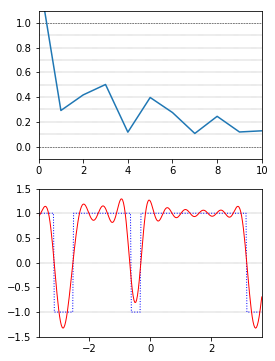

In [5]:
fs.doAll(lambda x: pwm(0.1)(x) + pwm(0.05)(x-2.5) - 1)